# This lecture teaches you how to transform regular texts to network data for network analytics

In [1]:
import requests
from lxml import html
import csv
import re

# First, a 1 minutes tutorial on XPath :)

In [2]:
sampledata = '''
<p>A</p>
<p>B</p>
<p>A</p>
<p><a>D</a></p>
<p>A</p>
<p>C</p>       
'''
doc = html.fromstring(sampledata)
data = doc.xpath("//p/text()")
data

['A', 'B', 'A', 'A', 'C']

In [3]:
sampledata = '''
<p>A</p>
<p>B</p>
<p>A</p>
<p><a>Hello</a></p>
<p>A</p>
<p>C</p>       
'''
doc = html.fromstring(sampledata)
data = doc.xpath("//p/text() | //p/a/text()")
data

['A', 'B', 'A', 'Hello', 'A', 'C']

# 2015 marchmadness complete results
http://abcnews.go.com/Sports/march-madness-2015-complete-schedule-key-dates/story?id=29618079
# Can we visualize the texts as a network?

In [4]:
data = html.fromstring(requests.get("http://abcnews.go.com/Sports/march-madness-2015-complete-schedule-key-dates/story?id=29618079").text)

In [5]:
winner = data.xpath("//div[@class='article-copy']/p[@itemprop='articleBody']/strong/text()")
winner

['March 17',
 'Hampton',
 'Ole Miss',
 'March 18',
 'Robert Morris',
 'Dayton',
 'March 19',
 'Georgia State',
 'North Carolina',
 'Arkansas',
 'Xavier',
 'Kentucky',
 'UAB',
 'UCLA',
 'Cincinnati',
 'Villanova',
 'Notre Dame',
 'Butler',
 'North Carolina State',
 'Arizona',
 'Georgetown',
 'Ohio State',
 'March 20',
 'Duke',
 'Virginia',
 ' Michigan State',
 'San Diego State',
 'Oklahoma',
 'Maryland',
 'West Virginia',
 'Dayton',
 'Wisconsin',
 'Kansas',
 'Wichita State',
 'Oregon',
 'Gonzaga,',
 'Louisville',
 'Northern Iowa',
 'Iowa',
 'March 21',
 'Xavier',
 'North Carolina',
 'Arizona',
 'Utah',
 'Kentucky',
 'UCLA',
 'Notre Dame',
 'North Carolina State',
 'March 22',
 'Michigan State',
 'Wichita State',
 'Wisconsin',
 'West Virginia',
 'Louisville',
 'Duke',
 'Oklahoma',
 'Gonzaga',
 'March 26',
 'Kentucky',
 'Notre Dame',
 'Wisconsin',
 'Arizona',
 'March 27',
 'Louisville',
 'Michigan State',
 'Duke',
 'Gonzaga',
 'March 28',
 'Kentucky',
 'Wisconsin',
 'March 29',
 'Michigan

Utah is missing in the above result


In [6]:
winner = data.xpath("//div[@class='article-copy']/p[@itemprop='articleBody']/strong/text() | //div[@class='article-copy']/p[@itemprop='articleBody']/strong/a/text()")
winner

['March 17',
 'Hampton',
 'Ole Miss',
 'March 18',
 'Robert Morris',
 'Dayton',
 'March 19',
 'Georgia State',
 'North Carolina',
 'Arkansas',
 'Xavier',
 'Kentucky',
 'UAB',
 'UCLA',
 'Cincinnati',
 'Villanova',
 'Notre Dame',
 'Butler',
 'North Carolina State',
 'Arizona',
 'Georgetown',
 'Utah',
 'Ohio State',
 'March 20',
 'Duke',
 'Virginia',
 ' Michigan State',
 'San Diego State',
 'Oklahoma',
 'Maryland',
 'West Virginia',
 'Dayton',
 'Wisconsin',
 'Kansas',
 'Wichita State',
 'Oregon',
 'Gonzaga,',
 'Louisville',
 'Northern Iowa',
 'Iowa',
 'March 21',
 'Xavier',
 'North Carolina',
 'Arizona',
 'Utah',
 'Kentucky',
 'UCLA',
 'Notre Dame',
 'North Carolina State',
 'March 22',
 'Michigan State',
 'Wichita State',
 'Wisconsin',
 'West Virginia',
 'Louisville',
 'Duke',
 'Oklahoma',
 'Gonzaga',
 'March 26',
 'Kentucky',
 'Notre Dame',
 'Wisconsin',
 'Arizona',
 'March 27',
 'Louisville',
 'Michigan State',
 'Duke',
 'Gonzaga',
 'March 28',
 'Kentucky',
 'Wisconsin',
 'March 29',
 

The data still has some issues (e.g., numbers, March, April)

In [7]:
winner = data.xpath("//div[@class='article-copy']/p[@itemprop='articleBody']/strong/text() | //div[@class='article-copy']/p[@itemprop='articleBody']/strong/a/text()")
for i in winner:
    i = i.strip()
    i= re.sub('[^a-zA-Z]', '',i)
    print i

March
Hampton
OleMiss
March
RobertMorris
Dayton
March
GeorgiaState
NorthCarolina
Arkansas
Xavier
Kentucky
UAB
UCLA
Cincinnati
Villanova
NotreDame
Butler
NorthCarolinaState
Arizona
Georgetown
Utah
OhioState
March
Duke
Virginia
MichiganState
SanDiegoState
Oklahoma
Maryland
WestVirginia
Dayton
Wisconsin
Kansas
WichitaState
Oregon
Gonzaga
Louisville
NorthernIowa
Iowa
March
Xavier
NorthCarolina
Arizona
Utah
Kentucky
UCLA
NotreDame
NorthCarolinaState
March
MichiganState
WichitaState
Wisconsin
WestVirginia
Louisville
Duke
Oklahoma
Gonzaga
March
Kentucky
NotreDame
Wisconsin
Arizona
March
Louisville
MichiganState
Duke
Gonzaga
March
Kentucky
Wisconsin
March
MichiganState
Duke
April
Wisconsin
Duke
April
Duke


In [8]:
winningteam = []

winner = data.xpath("//div[@class='article-copy']/p[@itemprop='articleBody']/strong/text() | //div[@class='article-copy']/p[@itemprop='articleBody']/strong/a/text()")
for i in winner:
    i = i.strip()
    # remove non-alphabetic characters (e.g., numbers)
    i= re.sub('[^a-zA-Z]', '',i)
    # remove the words (e.g., March, April)
    if i <> 'March' and i <> 'April':
        winningteam.append(i)
        
winningteam

['Hampton',
 'OleMiss',
 'RobertMorris',
 'Dayton',
 'GeorgiaState',
 'NorthCarolina',
 'Arkansas',
 'Xavier',
 'Kentucky',
 'UAB',
 'UCLA',
 'Cincinnati',
 'Villanova',
 'NotreDame',
 'Butler',
 'NorthCarolinaState',
 'Arizona',
 'Georgetown',
 'Utah',
 'OhioState',
 'Duke',
 'Virginia',
 'MichiganState',
 'SanDiegoState',
 'Oklahoma',
 'Maryland',
 'WestVirginia',
 'Dayton',
 'Wisconsin',
 'Kansas',
 'WichitaState',
 'Oregon',
 'Gonzaga',
 'Louisville',
 'NorthernIowa',
 'Iowa',
 'Xavier',
 'NorthCarolina',
 'Arizona',
 'Utah',
 'Kentucky',
 'UCLA',
 'NotreDame',
 'NorthCarolinaState',
 'MichiganState',
 'WichitaState',
 'Wisconsin',
 'WestVirginia',
 'Louisville',
 'Duke',
 'Oklahoma',
 'Gonzaga',
 'Kentucky',
 'NotreDame',
 'Wisconsin',
 'Arizona',
 'Louisville',
 'MichiganState',
 'Duke',
 'Gonzaga',
 'Kentucky',
 'Wisconsin',
 'MichiganState',
 'Duke',
 'Wisconsin',
 'Duke',
 'Duke']

In [9]:
losingteam = []
loser = data.xpath("//div[@class='article-copy']/p[@itemprop='articleBody']/text()[2]")
for i in loser:
    i = i.strip()
    i = re.sub('\([^)]*\)', '', i)
    i= re.sub('[^a-zA-Z]', '',i)
    losingteam.append(i)

losingteam

['ManhattanCollege',
 'BYU',
 'NorthFlorida',
 'BoiseState',
 'Baylor',
 'Harvard',
 'Wofford',
 'OleMiss',
 'Hampton',
 'IowaState',
 'SMU',
 'Purdue',
 'Lafayette',
 'Northeastern',
 'Texas',
 'LSU',
 'TexasSouthern',
 'EasternWashington',
 'StephenFAustin',
 'VCU',
 'RobertMorris',
 'Belmont',
 'Georgia',
 'StJohns',
 'Albany',
 'Valparaiso',
 'Buffalo',
 'Providence',
 'CoastalCarolina',
 'NewMexicoState',
 'Indiana',
 'OklahomaState',
 'NorthDakotaState',
 'UCIrvine',
 'Wyoming',
 'Davidson',
 'GeorgiaState',
 'Arkansas',
 'OhioState',
 'Georgetown',
 'Cincinnati',
 'UAB',
 'Butler',
 'Villanova',
 'Virginia',
 'Kansas',
 'Oregon',
 'Maryland',
 'NorthernIowa',
 'SanDiegoState',
 'Dayton',
 'Iowa',
 'WestVirginia',
 'WichitaState',
 'NorthCarolina',
 'Xavier',
 'NorthCarolinaState',
 'Oklahoma',
 'Utah',
 'UCLA',
 'NotreDame',
 'Arizona',
 'Louisville',
 'Gonzaga',
 'Kentucky',
 'MichiganState',
 'Wisconsin']

In [10]:
final = zip(losingteam, winningteam)
final

[('ManhattanCollege', 'Hampton'),
 ('BYU', 'OleMiss'),
 ('NorthFlorida', 'RobertMorris'),
 ('BoiseState', 'Dayton'),
 ('Baylor', 'GeorgiaState'),
 ('Harvard', 'NorthCarolina'),
 ('Wofford', 'Arkansas'),
 ('OleMiss', 'Xavier'),
 ('Hampton', 'Kentucky'),
 ('IowaState', 'UAB'),
 ('SMU', 'UCLA'),
 ('Purdue', 'Cincinnati'),
 ('Lafayette', 'Villanova'),
 ('Northeastern', 'NotreDame'),
 ('Texas', 'Butler'),
 ('LSU', 'NorthCarolinaState'),
 ('TexasSouthern', 'Arizona'),
 ('EasternWashington', 'Georgetown'),
 ('StephenFAustin', 'Utah'),
 ('VCU', 'OhioState'),
 ('RobertMorris', 'Duke'),
 ('Belmont', 'Virginia'),
 ('Georgia', 'MichiganState'),
 ('StJohns', 'SanDiegoState'),
 ('Albany', 'Oklahoma'),
 ('Valparaiso', 'Maryland'),
 ('Buffalo', 'WestVirginia'),
 ('Providence', 'Dayton'),
 ('CoastalCarolina', 'Wisconsin'),
 ('NewMexicoState', 'Kansas'),
 ('Indiana', 'WichitaState'),
 ('OklahomaState', 'Oregon'),
 ('NorthDakotaState', 'Gonzaga'),
 ('UCIrvine', 'Louisville'),
 ('Wyoming', 'NorthernIowa')

In [11]:
output = open("data/output_marchmadness.csv", "wb")
w = csv.writer(output)
w.writerows(final)
output.close()

68 nodes & 67 edges

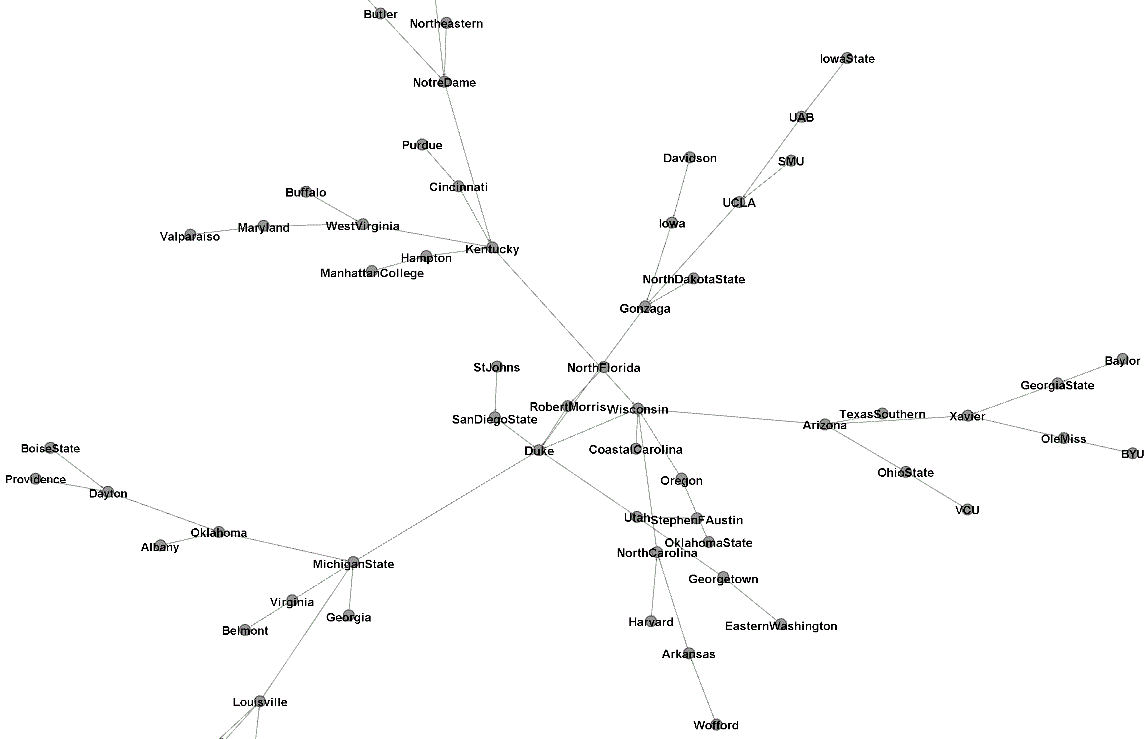

In [12]:
from IPython.display import Image
Image("data/marchmadness.png")